In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("../data/train.csv")

In [30]:
#Setting Datatypes
datatype = {"Id":"int16", "MSSubClass":"int16", "LotFrontage":"float32", "LotArea":"int32", 
            "OverallQual":"int8","OverallCond":"int8","MasVnrArea":"float32", 
            "BsmtFinSF1":"int16","BsmtFinSF2":"int16","BsmtUnfSF":"int16","TotalBsmtSF":"int16",
            "1stFlrSF":"int16", "2ndFlrSF":"int16","LowQualFinSF":"int16","GrLivArea":"int16",
            "BsmtFullBath":"int8","BsmtHalfBath":"int8","FullBath":"int8","HalfBath":"int8",
            "BedroomAbvGr":"int8","KitchenAbvGr":"int8", "TotRmsAbvGrd":"int8","Fireplaces":"int16",
            "GarageCars":"int8","GarageArea":"int16", "WoodDeckSF":"int16","OpenPorchSF":"int16",
            "EnclosedPorch":"int16","3SsnPorch":"int16","ScreenPorch":"int16","PoolArea":"int16",
            "MiscVal":"int16","SalePrice":"int32"}
data = data.astype(datatype)
data["YearBuilt"] = pd.to_datetime(data["YearBuilt"],format="%Y") 
data["YearRemodAdd"] = pd.to_datetime(data["YearRemodAdd"],format="%Y") 
data["MoSold"] = pd.to_datetime(data["MoSold"],format="%m") 
data["YrSold"] = pd.to_datetime(data["YrSold"],format="%Y") 
data["GarageYrBlt"] = pd.to_datetime(data["GarageYrBlt"],format="%Y") 
data.index = data["Id"]

In [31]:
#Handeling Nan or Missing Values
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
data["Alley"] = data["Alley"].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")
data["Electrical"] = "SBrkr"
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
#Keeping GarageYrBlt & GarageFinish NaN values as NaN
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

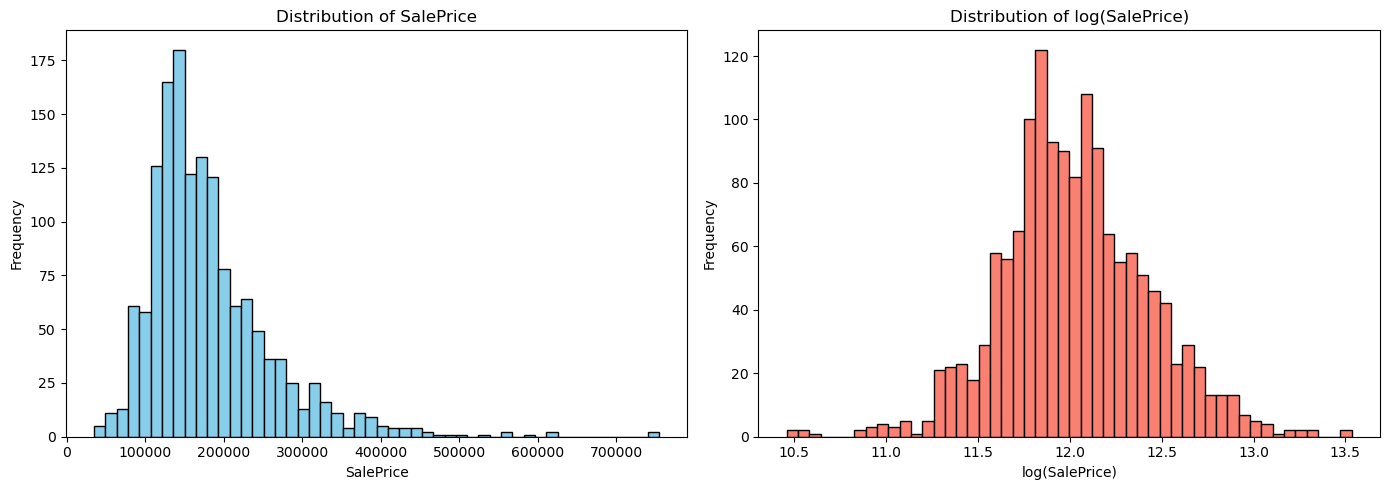

In [32]:
#Plotting distribution of SalePrice and of log(SalePrice)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(data["SalePrice"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")

plt.subplot(1, 2, 2)
plt.hist(np.log(data["SalePrice"]), bins=50, color="salmon", edgecolor="black")
plt.xlabel("log(SalePrice)")
plt.ylabel("Frequency")
plt.title("Distribution of log(SalePrice)")

plt.tight_layout()
plt.show()

In [23]:
#Label Encoding

#80 Features and 1460 House Ids
#1 Target Variable i.e. SalePrice



81
1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1900-02-01,2008-01-01,WD,Normal,208500
2,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1900-05-01,2007-01-01,WD,Normal,181500
3,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,1900-09-01,2008-01-01,WD,Normal,223500
4,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,1900-02-01,2006-01-01,WD,Abnorml,140000
5,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,1900-12-01,2008-01-01,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1900-08-01,2007-01-01,WD,Normal,175000
1457,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,1900-02-01,2010-01-01,WD,Normal,210000
1458,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,1900-05-01,2010-01-01,WD,Normal,266500
